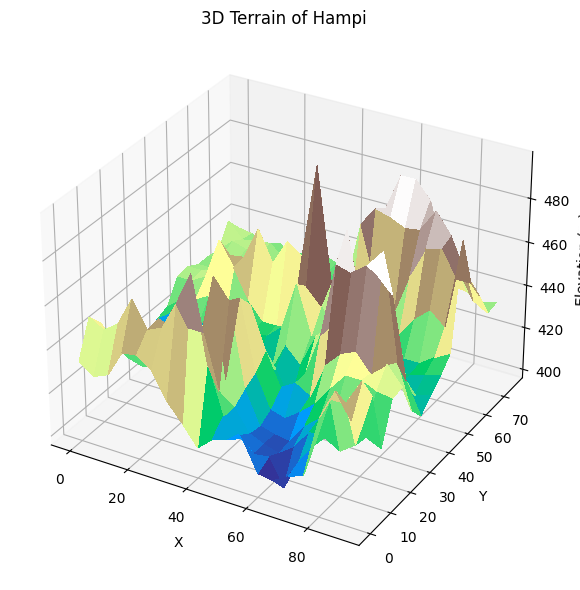

In [ ]:
# Terrain Analysis – Hampi

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Load the DEM
dem_path = "data/dem_clipped.tif"
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    profile = src.profile
    nodata = src.nodata

# Mask invalid values
dem = np.where(dem == nodata, np.nan, dem)

# 3D Terrain Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create grid
x = np.linspace(0, dem.shape[1]-1, dem.shape[1])
y = np.linspace(0, dem.shape[0]-1, dem.shape[0])
x, y = np.meshgrid(x, y)

# Downsample for performance
x_ds = x[::5, ::5]
y_ds = y[::5, ::5]
z_ds = dem[::5, ::5]

# Plot
ax.plot_surface(x_ds, y_ds, z_ds, cmap='terrain', linewidth=0, antialiased=False)
ax.set_title('3D Terrain of Hampi')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation (m)')
plt.tight_layout()

# Save
plt.savefig("results/3d_terrain.png", dpi=300)
plt.show()


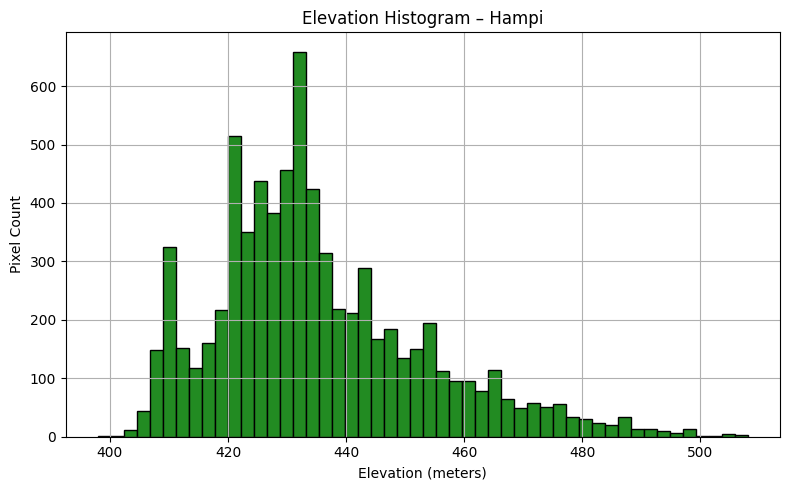

In [ ]:
# Elevation Histogram

plt.figure(figsize=(8, 5))
plt.hist(dem[~np.isnan(dem)].flatten(), bins=50, color='forestgreen', edgecolor='black')
plt.title("Elevation Histogram – Hampi")
plt.xlabel("Elevation (meters)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("results/elevation_histogram.png", dpi=300)
plt.show()